# Dataset reading and cleaning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import parselmouth
from scipy.stats import zscore

In [ ]:
cv_training_dataset = pd.read_excel("truncated_train.xlsx")
cv_training_dataset = cv_training_dataset.dropna(subset=['age'])

In [7]:
cv_training_dataset.to_csv("cleaned_dataset.csv", index=False)


# Training_voice feature extraction , scaling and age against feature dataset generation

In [2]:
training_dataset = pd.read_csv("extra/cleaned_dataset.csv")
training_dataset

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN
1,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN
2,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN
3,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN
4,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN
...,...,...,...,...,...,...,...,...
5610,cv-valid-train/sample-014993.mp3,but the marketplace was empty and he was far f...,1,0,fourties,male,us,NaN
5611,cv-valid-train/sample-014994.mp3,i have already described the appearance of tha...,2,0,thirties,female,canada,NaN
5612,cv-valid-train/sample-014995.mp3,i'm afraid i already know a great many people,2,0,thirties,male,us,NaN
5613,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,fourties,male,newzealand,NaN


# **FEATURE EXTARCTION**

### Pitch extraction using librosa

Pitch can be taken as the measure of sound frequency expressed in terms of Hertz. Higher the frequency, higher the pitch. All kinds of sound produces some waves that are measured with respect to the frequency it carries. Pitch can also be expressed as the position of a musical note in a musical scale.

In [24]:
pitches = []
for i in range(5615):
    y, sr = librosa.load(training_dataset.iloc[i,0])
    frequencies, magnitudes = librosa.piptrack(y=y, sr=sr)
    dominant_frequencies = np.max(frequencies, axis=0)
    average_pitch = np.mean(dominant_frequencies)
    pitches.append(average_pitch)

In [33]:
pitches_data = pd.DataFrame(pitches,columns=['pitches'])
pitches_data.to_csv("features/pitches_data.csv" , index=False)

### Formant Frequencies using library **parselmouth**

Formants are frequency peaks in the spectrum which have a high degree of energy. They are especially prominent in vowels. Each formant corresponds to a resonance in the vocal tract (roughly speaking, the spectrum has a formant every 1000 Hz). Formants can be considered as filters.

In [17]:
formant = []
for i in range(5615):
    sound = parselmouth.Sound(training_dataset.iloc[i,0])
    formants = sound.to_formant_burg(max_number_of_formants=5, maximum_formant=2000)
    new = formants.get_value_at_time(3,0.5)
    formant.append(new)

In [18]:
formant_data = pd.DataFrame(formant,columns=['formant'])
formant_data.to_csv("features/formant_data.csv" , index=False)

### Intensity of a voice

Vocal intensity is studied as a function of fundamental frequency and lung pressure. A combination of analytical and empirical models is used to predict sound pressure levels from glottal waveforms of five professional tenors and twenty five normal control subjects.

In [18]:
intensities = []
for i in range(5615):
    audio_file = training_dataset.iloc[i,0]   
    y, sr = librosa.load(audio_file)
    intensity = y**2
    average_intensity = np.mean(intensity)
    intensities.append(average_intensity)


In [21]:
intensities_data = pd.DataFrame(intensities,columns=['intensities'])
intensities_data.to_csv("features/intensities_data.csv" , index=False)

### Duration of a speech

In [26]:
durations = []
for i in range(5615):
    y, sr = librosa.load(training_dataset.iloc[i,0])
    duration = len(y) / sr
    durations.append(duration)


In [27]:
durations_data = pd.DataFrame(durations,columns=['durations'])
durations_data.to_csv("features/durations_data.csv" , index=False)

# Spectral Features

### 1. Spectral centroid

The spectral centroid represents the "center of mass" of the power spectrum and can capture changes in the average pitch of the voice, which may vary with age due to physiological changes in the vocal tract.

In [31]:
centorid = []
for i in range(5615):
    y, sr = librosa.load(training_dataset.iloc[i,0])
    mean_spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    centorid.append(mean_spectral_centroid)

In [76]:
centorid_data = pd.DataFrame(centorid,columns=['centroid'])
centorid_data.to_csv("features/centorid_data.csv" , index=False)

### 2. Spectral bandwidth

Changes in spectral bandwidth can reflect differences in vocal tract size and shape, which may vary with age. Younger individuals typically have narrower bandwidths, while older individuals may have broader bandwidths.

In [35]:
bandwidth = []
for i in range(5615):
    y, sr = librosa.load(training_dataset.iloc[i,0])
    mean_spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    bandwidth.append(mean_spectral_bandwidth)

In [36]:
bandwidth_data = pd.DataFrame(bandwidth,columns=['bandwidth'])
bandwidth_data.to_csv("features/bandwidth_data.csv" , index=False)

### 3. Spectral contrast

 Spectral contrast measures the difference in magnitude between peaks and valleys in different frequency bands. Changes in spectral contrast can reflect differences in vocal timbre and texture, which may vary with age.

In [41]:
contrast = []
for i in range(5615):
    y, sr = librosa.load(training_dataset.iloc[i,0])
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean(axis=1)
    mean_spectral_contrast = np.mean(spectral_contrast)
    contrast.append(mean_spectral_contrast)

In [43]:
contrast_data = pd.DataFrame(contrast,columns=['contrast'])
contrast_data.to_csv("features/contrast_data.csv" , index=False)

### 4. Spectral flatness

Spectral flatness quantifies how flat or peaky the spectrum is and can capture changes in tonality or noisiness in the voice, which may vary with age.

In [45]:
flatness = []
for i in range(5615):
    y, sr = librosa.load(training_dataset.iloc[i,0])
    mean_spectral_flatness = librosa.feature.spectral_flatness(y=y).mean()
    flatness.append(mean_spectral_flatness)

In [46]:
flatness_data = pd.DataFrame(flatness,columns=['flatness'])
flatness_data.to_csv("features/flatness_data.csv" , index=False)

### 5. Mel-frequency cepstral coefficients (MFCCs)

MFCCs capture the shape of the spectral envelope of the voice and are widely used in speech and audio processing tasks. Changes in MFCCs can reflect differences in vocal tract characteristics, which may vary with age.

In [48]:
mfcc = []
for i in range(5615):
    y, sr = librosa.load(training_dataset.iloc[i,0])
    mfccs = librosa.feature.mfcc(y=y, sr=sr).mean(axis=1)
    mean_mfcc = np.mean(mfccs)
    mfcc.append(mean_mfcc)

In [49]:
mfcc_data = pd.DataFrame(mfcc,columns=['mfcc'])
mfcc_data.to_csv("features/mfcc_data.csv" , index=False)

### 6. Chroma features

Chroma features capture the distribution of energy across different pitch classes and can capture changes in tonal content in the voice, which may vary with age.

In [51]:
chroma = []
for i in range(5615):
    y, sr = librosa.load(training_dataset.iloc[i,0])
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)
    mean_chroma = np.mean(chroma_stft)
    chroma.append(mean_chroma)

In [52]:
chroma_data = pd.DataFrame(chroma,columns=['chroma'])
chroma_data.to_csv("features/chroma_data.csv" , index=False)

### 7. Zero-crossing rate

Zero-crossing rate indicates the rate at which the voice signal changes sign and can capture changes in high-frequency content or abrupt changes in the voice signal, which may vary with age.

In [54]:
ZC_rate = []
for i in range(5615):
    y, sr = librosa.load(training_dataset.iloc[i,0])
    mean_ZC_rate = librosa.feature.zero_crossing_rate(y).mean()
    ZC_rate.append(mean_ZC_rate)

In [55]:
ZC_rate_data = pd.DataFrame(ZC_rate,columns=['ZC_rate'])
ZC_rate_data.to_csv("features/ZC_rate_data.csv" , index=False)

### 8. RMS energy

RMS energy represents the overall energy level of the voice signal and can capture differences in vocal intensity, which may vary with age.

In [57]:
RMS = []
for i in range(5615):
    y, sr = librosa.load(training_dataset.iloc[i,0])
    RMS_mean = librosa.feature.rms(y=y).mean()
    RMS.append(RMS_mean)

In [58]:
RMS_data = pd.DataFrame(RMS,columns=['RMS'])
RMS_data.to_csv("features/RMS_data.csv" , index=False)

# **FINALIZING DATASET**

In [3]:
new_dataset = training_dataset.copy()
cols = ['pitches','formant','intensities','durations','centorid','bandwidth','contrast','flatness','mfcc','chroma','ZC_rate','RMS']
for i in range(12):
    dataset = pd.read_csv(f"extra/features/{cols[i]}_data.csv")
    new_dataset = pd.concat([new_dataset, dataset], axis=1)

In [4]:
new_dataset = new_dataset.drop(columns=['duration'])
new_dataset = new_dataset.drop(columns=['filename'])
new_dataset = new_dataset.drop(columns=['accent'])
new_dataset = new_dataset.drop(columns=['text'])
new_dataset = new_dataset.drop(columns=['gender'])
new_dataset = new_dataset.drop(columns=['up_votes'])
new_dataset = new_dataset.drop(columns=['down_votes'])
new_dataset

,age,pitches,formant,intensities,durations,centroid,bandwidth,contrast,flatness,mfcc,chroma,ZC_rate,RMS
0,twenties,1481.53720,929.472954,0.000098,5.832018,1827.311987,1891.320949,23.378140,0.008766,-27.616856,0.344941,0.091991,0.006928
1,seventies,2807.45560,1404.785312,0.000438,1.728027,2405.960499,1929.718346,22.100908,0.039348,-21.074581,0.390814,0.167148,0.015059
2,thirties,2711.68100,1149.107429,0.002647,4.224036,1853.162934,1379.076501,25.504311,0.001174,-20.890915,0.314568,0.120109,0.038097
3,sixties,947.87366,1154.355040,0.001932,5.376009,1844.103872,1897.411920,22.804903,0.022437,-17.845570,0.357120,0.082688,0.032311
4,fifties,1279.56670,1272.411817,0.002929,3.720000,1910.288328,2246.722831,20.063901,0.032897,-3.291735,0.535417,0.081373,0.045045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,fourties,1151.73820,1275.389511,0.000451,7.464036,2491.091267,2610.666343,20.821479,0.041672,-15.991011,0.472483,0.107627,0.014189
5611,thirties,2122.24340,1149.787851,0.000987,6.696009,2661.455617,2464.620341,21.308159,0.065436,-21.563526,0.424682,0.179241,0.024267
5612,thirties,2405.65650,963.325761,0.010449,3.024036,1617.040846,1540.098975,23.177594,0.004235,-12.651630,0.424517,0.099352,0.073049
5613,fourties,1917.23340,1475.195409,0.010103,4.704036,2828.373721,2549.377771,23.459514,0.010159,-10.386553,0.391599,0.205843,0.074363


In [5]:
new_dataset.to_csv('unnormalize_dataset_new.csv',index=False)

### **SCALING DATA USING Z SCORE**

that's correct. Z-score normalization (standardization) will transform your numerical features so that they have a mean of 0 and a standard deviation of 1. This ensures that all features are on a similar scale and have comparable magnitudes, which is important for many machine learning algorithms.

By standardizing the features, you prevent features with larger scales from dominating those with smaller scales during the training process. This can lead to better model performance, especially for algorithms that are sensitive to the scale of features, such as support vector machines (SVM) or k-nearest neighbors (KNN).

In summary, standardizing your features using Z-score normalization is a common preprocessing step to ensure that all features contribute equally to the learning process and to improve the stability and performance of your machine learning models.

In [6]:
cols_to_normalize = ['pitches', 'formant', 'intensities', 'durations', 'centroid', 'bandwidth', 'contrast', 'flatness', 'mfcc', 'chroma', 'ZC_rate', 'RMS']
new_dataset[cols_to_normalize] = new_dataset[cols_to_normalize].apply(zscore)
new_dataset

,age,pitches,formant,intensities,durations,centroid,bandwidth,contrast,flatness,mfcc,chroma,ZC_rate,RMS
0,twenties,-1.100763,-1.065866,-0.633397,1.019516,-0.827810,-0.361215,0.839573,-0.736260,-1.790606,-1.071963,-0.983209,-1.107768
1,seventies,1.194231,1.826435,-0.598026,-1.314697,0.172173,-0.265589,-0.151613,-0.054082,-0.682186,-0.327999,0.492420,-0.869747
2,thirties,1.028457,0.270622,-0.368333,0.104950,-0.783136,-1.636921,2.489573,-0.905618,-0.651068,-1.564536,-0.431137,-0.195347
3,sixties,-2.024465,0.302554,-0.442639,0.760154,-0.798791,-0.346046,0.394717,-0.431316,-0.135113,-0.874447,-1.165856,-0.364713
4,fifties,-1.450348,1.020936,-0.338997,-0.181729,-0.684416,0.523887,-1.732418,-0.197982,2.330660,2.017155,-1.191670,0.008064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,fourties,-1.671602,1.039055,-0.596675,1.947754,0.319290,1.430261,-1.144505,-0.002236,0.179095,0.996504,-0.676216,-0.895225
5611,thirties,0.008217,0.274762,-0.540969,1.510926,0.613703,1.066544,-0.766820,0.527849,-0.765025,0.221273,0.729851,-0.600204
5612,thirties,0.498768,-0.859869,0.442872,-0.577570,-1.191187,-1.235907,0.683941,-0.837334,0.744867,0.218596,-0.838674,0.827827
5613,fourties,-0.346629,2.254885,0.406839,0.377958,0.902160,1.277626,0.902723,-0.705191,1.128626,-0.315262,1.252139,0.866322


# **DATA VISUALIZATION**

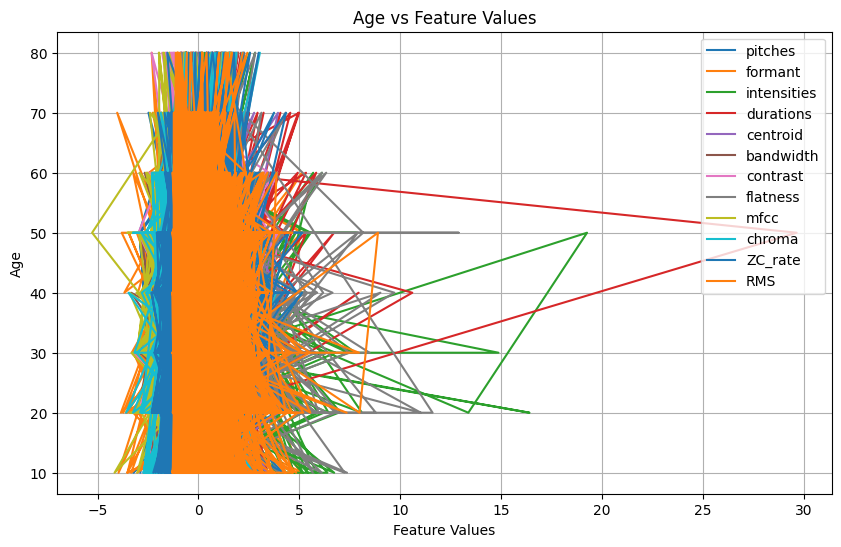

In [125]:

features = [col for col in dataset_training.keys() if col != 'age']
age_values = dataset_training['age']

# Plot each feature
plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(dataset_training[feature], age_values, label=feature)

# Customize plot
plt.xlabel('Feature Values')
plt.ylabel('Age')
plt.title('Age vs Feature Values')
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

# **MODEL TRAINING**

In [8]:
dataset = pd.read_csv('final_data_set_new.csv')
dataset

,age,pitches,formant,intensities,durations,centroid,bandwidth,contrast,flatness,mfcc,chroma,ZC_rate,RMS
0,twenties,-1.100763,-1.065866,-0.633397,1.019516,-0.827810,-0.361215,0.839573,-0.736260,-1.790606,-1.071963,-0.983209,-1.107768
1,seventies,1.194231,1.826435,-0.598026,-1.314697,0.172173,-0.265589,-0.151613,-0.054082,-0.682186,-0.327999,0.492420,-0.869747
2,thirties,1.028457,0.270622,-0.368333,0.104950,-0.783136,-1.636921,2.489573,-0.905618,-0.651068,-1.564536,-0.431137,-0.195347
3,sixties,-2.024465,0.302554,-0.442639,0.760154,-0.798791,-0.346046,0.394717,-0.431316,-0.135113,-0.874447,-1.165856,-0.364713
4,fifties,-1.450348,1.020936,-0.338997,-0.181729,-0.684416,0.523887,-1.732418,-0.197982,2.330660,2.017155,-1.191670,0.008064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,fourties,-1.671602,1.039055,-0.596675,1.947754,0.319290,1.430261,-1.144505,-0.002236,0.179095,0.996504,-0.676216,-0.895225
5611,thirties,0.008217,0.274762,-0.540969,1.510926,0.613703,1.066544,-0.766820,0.527849,-0.765025,0.221273,0.729851,-0.600204
5612,thirties,0.498768,-0.859869,0.442872,-0.577570,-1.191187,-1.235907,0.683941,-0.837334,0.744867,0.218596,-0.838674,0.827827
5613,fourties,-0.346629,2.254885,0.406839,0.377958,0.902160,1.277626,0.902723,-0.705191,1.128626,-0.315262,1.252139,0.866322


In [123]:
dataset_training = pd.read_csv('final_data_set_new.csv')

In [124]:
mapping = {'teens':10, 'twenties': 20, 'thirties': 30, 'fourties': 40, 'fifties': 50, 'sixties': 60, 'seventies': 70, 'eighties': 80, 'nineties': 90}
dataset_training['age'] = dataset_training['age'].replace(mapping)
dataset_training

/tmp/ipykernel_7708/1867096579.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_training['age'] = dataset_training['age'].replace(mapping)


,age,pitches,formant,intensities,durations,centroid,bandwidth,contrast,flatness,mfcc,chroma,ZC_rate,RMS
0,20,-1.100763,-1.065866,-0.633397,1.019516,-0.827810,-0.361215,0.839573,-0.736260,-1.790606,-1.071963,-0.983209,-1.107768
1,70,1.194231,1.826435,-0.598026,-1.314697,0.172173,-0.265589,-0.151613,-0.054082,-0.682186,-0.327999,0.492420,-0.869747
2,30,1.028457,0.270622,-0.368333,0.104950,-0.783136,-1.636921,2.489573,-0.905618,-0.651068,-1.564536,-0.431137,-0.195347
3,60,-2.024465,0.302554,-0.442639,0.760154,-0.798791,-0.346046,0.394717,-0.431316,-0.135113,-0.874447,-1.165856,-0.364713
4,50,-1.450348,1.020936,-0.338997,-0.181729,-0.684416,0.523887,-1.732418,-0.197982,2.330660,2.017155,-1.191670,0.008064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,40,-1.671602,1.039055,-0.596675,1.947754,0.319290,1.430261,-1.144505,-0.002236,0.179095,0.996504,-0.676216,-0.895225
5611,30,0.008217,0.274762,-0.540969,1.510926,0.613703,1.066544,-0.766820,0.527849,-0.765025,0.221273,0.729851,-0.600204
5612,30,0.498768,-0.859869,0.442872,-0.577570,-1.191187,-1.235907,0.683941,-0.837334,0.744867,0.218596,-0.838674,0.827827
5613,40,-0.346629,2.254885,0.406839,0.377958,0.902160,1.277626,0.902723,-0.705191,1.128626,-0.315262,1.252139,0.866322


# Multiple regression

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression is to model the linear relationship between the explanatory (independent) variables and response (dependent) variables. In essence, multiple regression is the extension of ordinary least-squares (OLS) regression because it involves more than one explanatory variable. 

### **KEYTAKEAWAYS**

**->** Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable.

**->** Multiple regression is an extension of linear (OLS) regression that uses just one explanatory variable.

**->** MLR is used extensively in econometrics and financial inference

# Calculating loss function

In [36]:
def loss_function(m, c, points):
    X = points[:, 1:]  # Features
    y = points[:, 0]   # Target
    predictions = np.dot(X, m) + c
    error = np.mean((y - predictions) ** 2)
    return error

# gradient_descent

In [37]:
def gradient_descent(m_now, b_now, points, L):
    X = points[:, 1:]
    y = points[:, 0]
    n = len(points)
    m_gradient = np.zeros_like(m_now)
    b_gradient = 0
    for i in range(n):
        pred = np.dot(X[i], m_now) + b_now
        error = y[i] - pred
        m_gradient += -(2/n) * X[i] * error
        b_gradient += -(2/n) * error
    m_new = m_now - L * m_gradient
    b_new = b_now - L * b_gradient
    return m_new, b_new

# EPOCH

In [110]:
m = np.zeros(12)  
c = 0            
lr = 0.00000001 
epochs = 10000    

for i in range(epochs):
    m, c = gradient_descent(m, c, dataset_training.values, lr)  
    if i % 50 == 0:
        error = loss_function(m, c, dataset_training.values)  
        print(f"Epoch {i} - Error: {error}")


Epoch 0 - Error: 736.1783481871713
Epoch 50 - Error: 241.99403176291375
Epoch 100 - Error: 239.27573305374787
Epoch 150 - Error: 236.99948003865273
Epoch 200 - Error: 235.08817473013156
Epoch 250 - Error: 233.4799513158765
Epoch 300 - Error: 232.12458267313949
Epoch 350 - Error: 230.9809040810421
Epoch 400 - Error: 230.014924984539
Epoch 450 - Error: 229.19841452531702
Epoch 500 - Error: 228.50781985116998
Epoch 550 - Error: 227.92342323152795
Epoch 600 - Error: 227.42867436839083
Epoch 650 - Error: 227.00965406646122
Epoch 700 - Error: 226.6546384436006
Epoch 750 - Error: 226.35374154449968
Epoch 800 - Error: 226.09862010152113
Epoch 850 - Error: 225.88222824287325
Epoch 900 - Error: 225.69861280256592
Epoch 950 - Error: 225.54274193879195
Epoch 1000 - Error: 225.41036127581853
Epoch 1050 - Error: 225.29787291757881
Epoch 1100 - Error: 225.20223354989545
Epoch 1150 - Error: 225.12086852675566
Epoch 1200 - Error: 225.05159937456634
Epoch 1250 - Error: 224.99258258157997
Epoch 1300 - Er

# **MODEL TESTING**

In [117]:
age_prediction_dict = {
    'real_age' : [],
    'predicted_age' : []
}

In [118]:
testing_dataset = pd.read_csv('cv-valid-test.csv')
testing_dataset.dropna(subset='age',inplace = True)
mapping = {'teens':10, 'twenties': 20, 'thirties': 30, 'fourties': 40, 'fifties': 50, 'sixties': 60, 'seventies': 70, 'eighties': 80, 'nineties': 90}
testing_dataset['age'] = testing_dataset['age'].replace(mapping)
testing_dataset = testing_dataset.drop(columns=['duration'])
testing_dataset = testing_dataset.drop(columns=['accent'])
testing_dataset = testing_dataset.drop(columns=['text'])
testing_dataset = testing_dataset.drop(columns=['gender'])
testing_dataset = testing_dataset.drop(columns=['up_votes'])
testing_dataset = testing_dataset.drop(columns=['down_votes'])
testing_dataset

/tmp/ipykernel_7708/3757781311.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testing_dataset['age'] = testing_dataset['age'].replace(mapping)


,filename,age
1,cv-valid-test/sample-000001.mp3,20
3,cv-valid-test/sample-000003.mp3,20
5,cv-valid-test/sample-000005.mp3,20
6,cv-valid-test/sample-000006.mp3,20
7,cv-valid-test/sample-000007.mp3,30
...,...,...
3976,cv-valid-test/sample-003976.mp3,30
3979,cv-valid-test/sample-003979.mp3,30
3980,cv-valid-test/sample-003980.mp3,50
3984,cv-valid-test/sample-003984.mp3,30


In [115]:
num_of_correct_output = 0
for i in range(1542):
    y, sr = librosa.load(testing_dataset.iloc[i,0])
    age = testing_dataset.iloc[i,1]
    
    # Pitch extraction
    frequencies, magnitudes = librosa.piptrack(y=y, sr=sr)
    dominant_frequencies = np.max(frequencies, axis=0)
    pitch = np.mean(dominant_frequencies)
    
    # Formant extraction
    sound = parselmouth.Sound(testing_dataset.iloc[i,0])
    formants = sound.to_formant_burg(max_number_of_formants=5, maximum_formant=2000)
    formant = formants.get_value_at_time(3,0.5)
    
    # Intensity extraction
    intens = y**2
    intensity = np.mean(intens)
    
    # Duration extraction
    duration = len(y) / sr
    
    # Centroid
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    
    # Bandwidth
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    
    # Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean(axis=1)
    contrast = np.mean(spectral_contrast)
    
    # Flatness
    flatness = librosa.feature.spectral_flatness(y=y).mean()
    
    # MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr).mean(axis=1)
    mfcc = np.mean(mfccs)
    
    # Chroma
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)
    chroma = np.mean(chroma_stft)
    
    # Zero Crossing Rate
    ZC_rate = librosa.feature.zero_crossing_rate(y).mean()
    
    # Root Mean Square
    RMS = librosa.feature.rms(y=y).mean()
    
    # Create feature vector
    X = [pitch, formant, intensity, duration, centroid, bandwidth, contrast, flatness, mfcc, chroma, ZC_rate, RMS]
    
    # Predict age using the trained model and scaler
    prediction = np.dot(m, X) + c
    if (prediction > age) and (prediction < (age+10)):
        num_of_correct_output+=1
    age_prediction_dict['real_age'].append(age)
    age_prediction_dict['predicted_age'].append(prediction)

accuracy = (num_of_correct_output/1542)*100


In [119]:
print(f'Accuracy : {accuracy}\n')

Accuracy : 26.588845654993516



In [121]:
for real_age, predicted_age in zip(age_prediction_dict['real_age'], age_prediction_dict['predicted_age']):
    print(f'Real age: {real_age}, Predicted age: {predicted_age}\n')